In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv(r'D:\synthetic_music_dataset.csv')

In [3]:
df.head()

,user_id,song_id,play_count,last_play_time,tempo,energy,label
0,103,442,4,2023-09-08,136,0.529093,0
1,436,279,5,2023-09-28,159,0.805545,1
2,861,251,5,2023-09-03,168,0.937152,0
3,271,310,8,2023-08-12,127,0.759065,0
4,107,208,3,2023-08-29,94,0.798485,0


In [4]:
# Convert 'last_play_time' into numerical features (days since last play)
df['days_since_last_play'] = (pd.to_datetime('2023-10-10') - pd.to_datetime(df['last_play_time'])).dt.days


In [5]:
# Select features (excluding 'user_id', 'song_id', 'last_play_time', and 'label')
X = df[['play_count', 'tempo', 'energy', 'days_since_last_play']]

In [6]:
# Target variable (label column)
y = df['label']

In [7]:
# 3. Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# 5. Make predictions on the test set
y_pred_test = model.predict(X_test)


In [10]:
# 6. Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


In [11]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1333
           1       1.00      1.00      1.00       667

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [12]:

# 7. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

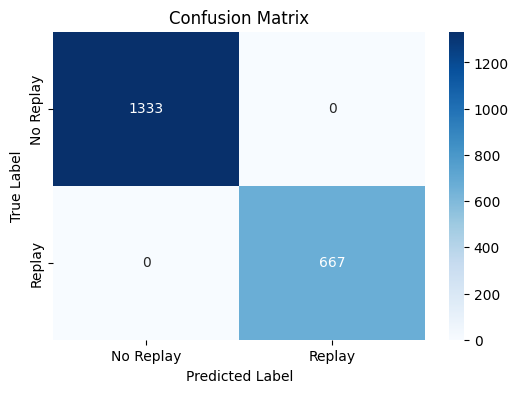

In [13]:
# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Replay', 'Replay'], yticklabels=['No Replay', 'Replay'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [14]:
# 8. Print predictions for each user
predictions = pd.DataFrame({
    'user_id': df.loc[X_test.index, 'user_id'],
    'song_id': df.loc[X_test.index, 'song_id'],
    'actual_label': y_test,
    'predicted_label': y_pred_test
})


In [15]:
print("\nPredictions for each user:")
predictions.head()


Predictions for each user:


,user_id,song_id,actual_label,predicted_label
6252,414,492,0,0
4684,688,218,0,0
1731,803,371,0,0
4742,736,233,1,1
4521,445,274,0,0
